# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Justi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Read your api key environment variable
load_dotenv('JFkeys.env')

True

In [27]:
# Initalize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# Create a newsapi client
api_key = os.getenv("news_api")

In [29]:
newsapi = NewsApiClient(api_key=api_key)

In [30]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q = "Bitcoin", language = "en")


In [31]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q = "Ethereum", language = "en")

In [32]:
ethereum_news

{'status': 'ok',
 'totalResults': 3732,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Connie Loizos',
   'title': 'Solana, a blockchain platform followed by top crypto investors, says it’s a lot faster than Ethereum',
   'description': 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko, who spent more than a dozen years as an engineer working on…',
   'url': 'http://techcrunch.com/2021/05/14/solana-a-blockchain-platform-followed-by-top-crypto-investors-says-its-a-lot-faster-than-ethereum/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/05/Screen-Shot-2021-05-14-at-6.41.59-PM.png?w=539',
   'publishedAt': '2021-05-15T01:49:36Z',
   'content': 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons,

In [33]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = []
for articles in bitcoin_news["articles"]:
# use try and except
# try and pull out content and teh date to find the most recent news
    try:
        text = articles["content"]
        date = articles["publishedAt"]
        # Use the Sentiment Intensity analyzer to recieve the polarity score
        sia = analyzer.polarity_scores(text)
        # pull the compund scores out as well
        compound = sia["compound"]
        # establish variables for positive negative and neutral for the text
        positive_sentiment = sia["pos"]
        negative_sentiment = sia["neg"]
        neutral_sentiment = sia["neu"]
        # append everything to a new dataframe 
        bitcoin_df.append({
            "text":text,
            "date":date,
            "compound":compound,
            "Pos":positive_sentiment,
            "Neg": negative_sentiment,
            "Neu": neutral_sentiment
        })
        
    except Error:
        pass

    

In [34]:
# Make the bitcoin df
bc_df = pd.DataFrame(bitcoin_df)
bc_df.head()
columns = ["date", "text", "compound", "Pos", "Neu", "Neg"]
bc_df = bc_df[columns]
bc_df.head()

,date,text,compound,Pos,Neu,Neg
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.718,0.0
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.957,0.0
2,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,1.000,0.0
3,2021-05-17T23:27:59Z,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.925,0.0
4,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.831,0.0


In [35]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth = []
for articles in ethereum_news["articles"]:
# use try and except
# try and pull out content and teh date to find the most recent news
    try:
        text = articles["content"]
        date = articles["publishedAt"]
        # Use the Sentiment Intensity analyzer to recieve the polarity score
        sia = analyzer.polarity_scores(text)
        # pull the compund scores out as well
        compound = sia["compound"]
        # establish variables for positive negative and neutral for the text
        positive_sentiment = sia["pos"]
        negative_sentiment = sia["neg"]
        neutral_sentiment = sia["neu"]
        # append everything to a new dataframe 
        eth.append({
            "text":text,
            "date":date,
            "compound":compound,
            "Pos":positive_sentiment,
            "Neg": negative_sentiment,
            "Neu": neutral_sentiment
        })
        
    except Error:
        pass

In [36]:
# Make new eth_df
eth_df = pd.DataFrame(eth)
eth_df = eth_df[columns]
eth_df.head()

,date,text,compound,Pos,Neu,Neg
0,2021-05-15T01:49:36Z,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.894,0.000
1,2021-05-19T16:05:22Z,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.847,0.087
2,2021-05-20T11:02:42Z,,0.0000,0.000,0.000,0.000
3,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...,0.0000,0.000,1.000,0.000
4,2021-05-19T12:20:07Z,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.801,0.132


In [37]:
# Describe the Bitcoin Sentiment
bc_df.describe()

,compound,Pos,Neu,Neg
count,20.000000,20.000000,20.000000,20.000000
mean,0.102645,0.067350,0.892300,0.040300
std,0.508532,0.080911,0.074962,0.055214
min,-0.762700,0.000000,0.718000,0.000000
25%,-0.315000,0.000000,0.844000,0.000000
50%,0.064000,0.051500,0.896500,0.000000
75%,0.560725,0.118750,0.938500,0.089250
max,0.840200,0.282000,1.000000,0.180000


In [38]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,Pos,Neu,Neg
count,20.000000,20.000000,20.000000,20.000000
mean,-0.041220,0.043150,0.856250,0.050550
std,0.392891,0.057794,0.220476,0.077423
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.345300,0.000000,0.809250,0.000000
50%,0.000000,0.000000,0.914500,0.000000
75%,0.146575,0.067250,1.000000,0.081750
max,0.670500,0.188000,1.000000,0.286000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean average score of 0.079 and ethereum had a score of 0.041.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score of 0.84 and ethereum had a max compound score of 0.67.

Q. Which coin had the highest positive score?

A: Bitcoin's max score was 0.282 where ethereum's max positive score was 0.18.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')
    
# Expand the default stopwords list if necessary
sw.append("''")
sw.append("...")

In [58]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation from text
    words = [word for word in words if word not in punctuation]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [63]:
# Create a new tokens column for Bitcoin
bc_df["toknes"] = bc_df['text'].apply(tokenizer)
bc_df.head()

,date,text,compound,Pos,Neu,Neg,toknes
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.718,0.0,"[el, salvador, 's, president, nayib, bukele, m..."
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.957,0.0,"[el, salvador, become, first, country, world, ..."
2,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,1.000,0.0,"[illustration, alex, castro, verge, cryptocurr..."
3,2021-05-17T23:27:59Z,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.925,0.0,"[last, week, whenelon, musk, tweeted, spoken, ..."
4,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.831,0.0,"['s, clean, energy, seems, elon, musk, tesla, ..."


In [66]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
eth_df.head()

,date,text,compound,Pos,Neu,Neg,tokens
0,2021-05-15T01:49:36Z,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.894,0.000,"[solana, ’, known, yet, outside, crypto, commu..."
1,2021-05-19T16:05:22Z,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.847,0.087,"[bitcoin, ethereum, host, altcoins, suffered, ..."
2,2021-05-20T11:02:42Z,,0.0000,0.000,0.000,0.000,[]
3,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...,0.0000,0.000,1.000,0.000,"[representation, virtual, currency, ethereum, ..."
4,2021-05-19T12:20:07Z,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.801,0.132,"[gpu, shortage, inflated, price, become, bypro..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [68]:
from collections import Counter
from nltk import ngrams

In [84]:
# Generate the Bitcoin N-grams where N=2
N = 2
btc_grams = ngrams(tokenizer(bc_df.text.str.cat()), N)
Counter(btc_grams).most_common(20)

[(('--', '--'), 22),
 (('elon', 'musk'), 4),
 (('el', 'salvador'), 3),
 (('last', 'week'), 3),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('bitcoin', 'legal'), 2),
 (('salvador', 'become'), 2),
 (('become', 'first'), 2),
 (('first', 'country'), 2),
 (('country', 'world'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('outage', 'morning'), 2),
 (('crypto', 'market'), 2),
 (('char', 'hello'), 2),
 (('hello', 'friend'), 2),
 (('friend', 'welcome'), 2),
 (('welcome', 'back'), 2),
 (('back', 'week'), 2),
 (('week', 'review'), 2)]

In [87]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
eth_grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(eth_grams).most_common(20)

[(('char', 'bitcoin'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('crypto', 'market'), 2),
 (('char', 'representation'), 2),
 (('representation', 'virtual'), 2),
 (('virtual', 'currency'), 2),
 (('illustration', 'taken'), 2),
 (('char', 'article'), 2),
 (('article', 'translated'), 2),
 (('translated', 'spanish'), 2),
 (('spanish', 'edition'), 2),
 (('edition', 'using'), 2),
 (('using', 'ai'), 2),
 (('ai', 'technology'), 2),
 (('technology', 'error'), 2),
 (('error', 'may'), 2),
 (('may', 'exist'), 2),
 (('exist', 'due'), 2),
 (('due', 'process'), 2),
 (('last', 'week'), 2)]

In [88]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [90]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokes = tokenizer(bc_df.text.str.cat())
token_count(btc_tokes, 10)

[('--', 23),
 ('char', 20),
 ('bitcoin', 13),
 ('cryptocurrency', 9),
 ('crypto', 9),
 ('week', 8),
 ("'s", 6),
 ('musk', 5),
 ('country', 4),
 ('…', 4)]

In [91]:
# Use token_count to get the top 10 words for Ethereum
eth_tokes = tokenizer(eth_df.text.str.cat())
token_count(eth_tokes, 10)

[('char', 19),
 ('ethereum', 7),
 ('week', 6),
 ('crypto', 5),
 ('…', 5),
 ('’', 4),
 ('market', 4),
 ("'s", 4),
 ('cryptocurrency', 4),
 ('may', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [93]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=450).generate(text)
    plt.imshow(df_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

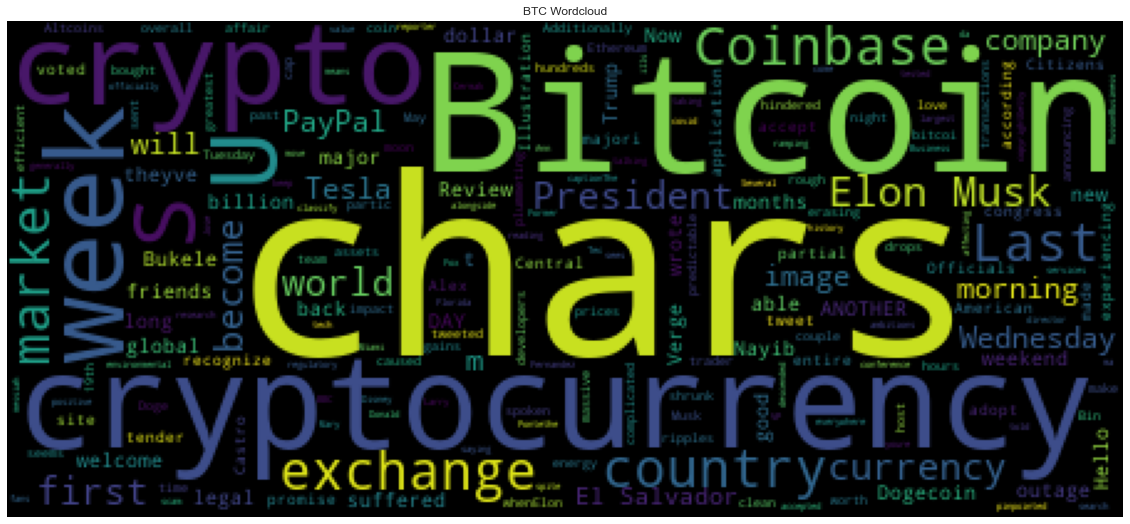

In [96]:
# Generate the Bitcoin word cloud
wordcloud(bc_df.text.str.cat(), title="BTC Wordcloud")

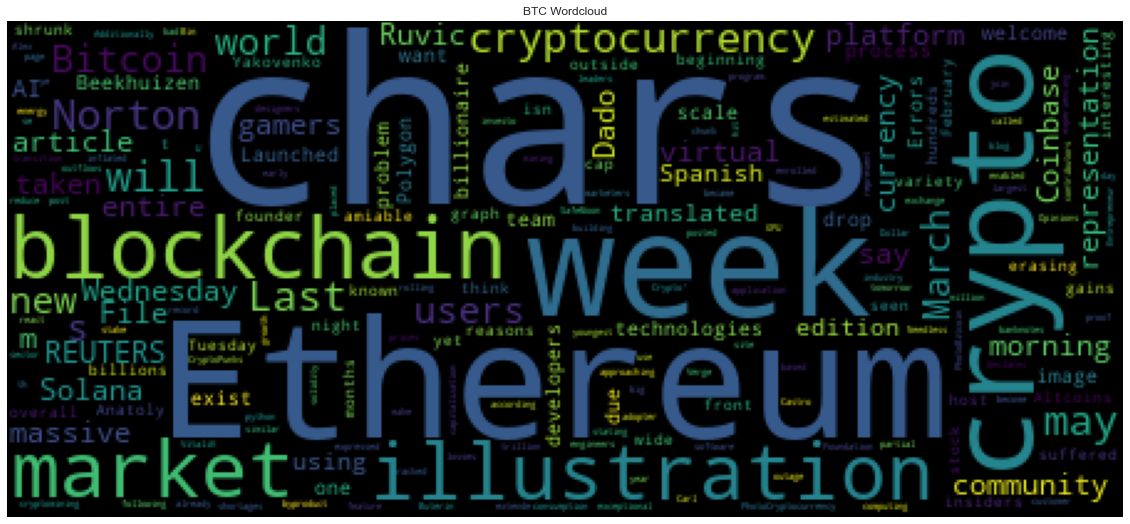

In [98]:
# Generate the Ethereum word cloud
wordcloud(eth_df.text.str.cat(), title="BTC Wordcloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [99]:
import spacy
from spacy import displacy

In [100]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [101]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [102]:
# Concatenate all of the Bitcoin text together
all_btc_text = bc_df.text.str.cat()

In [103]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data['title'] = "BTC NER"

In [112]:
# Render the visualization
#displacy.render(doc, style='ent', jupyter=True)

In [111]:
# List all Entities
for entity in doc.ents:
    print(entity.text, entity.label_)

---

### Ethereum NER

In [113]:
# Concatenate all of the Ethereum text together
all_eth_text = eth_df.text.str.cat()

In [115]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "ETH NER"

In [116]:
# Render the visualization
displacy.render(doc, style="ent", jupyter = True)

In [117]:
# List all Entities
for entity in doc.ents:
    print(entity.text, entity.label_)


Solana PERSON
Anatoly Yakovenko PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Ethereum ORG
February 19, 2021 DATE
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
99.95% PERCENT
Carl Beekhuizen PERSON
the Ethereum Foundation ORG
Beekhuizen ORG
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
chars]"We NORP
Bitcoin PERSON
U.S. Dollar ORG
May 26, 2020 DATE
Dado Ruvic/File PhotoBitcoin PERSON
last week DATE
one-day DATE
March last year DATE
Wednesday DATE
$1 trillion MONEY
Entrepreneur ORG
March 2021 DATE
more than one million CARDINAL
SafeMoon ORG
decades DATE
Ill PERSON
Jacks ORG
CriddleTechnology ORG
Kim Catdarshian PERSON
Ethereum ORG
Spanish NORP
AI ORG
This week DATE
March 2020 DATE
Ferdman/Getty Images ORG
Mark Cuban PERSON
Ethereum ORG
Polygon ORG
Polygon ORG
tEhereum ORG
La

---